### Cinematic Sentiments: Analyzing Movie Reviews Using NLP

#### Read and Observe the data

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
Movie_df = pd.read_csv('movie.csv')

In [3]:
indices_to_drop = range(15000, 50000)
Movie_df1 = Movie_df.drop(indices_to_drop)

In [4]:
Movie_df1.head(20)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",1
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 o...",1
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gun...,1
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny ...",0
8,Encouraged by the 1 comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almos...,0
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",1


In [5]:
Movie_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     15000 non-null  object
 1   sentiment  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [6]:
# Check for the class balance
Movie_df1['sentiment'].value_counts(normalize=True)

sentiment
0    0.507267
1    0.492733
Name: proportion, dtype: float64

<Axes: xlabel='sentiment'>

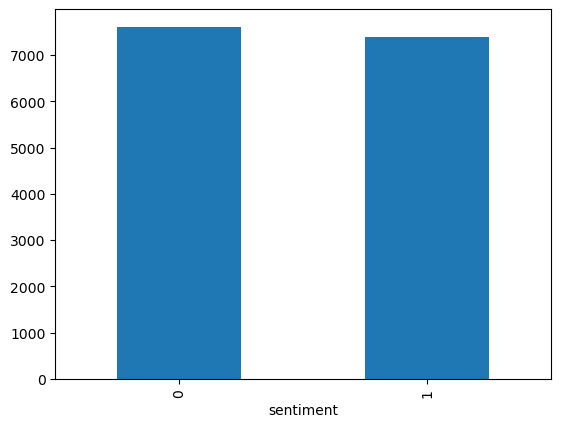

In [7]:
# plot the label counts 
Movie_df1['sentiment'].value_counts().plot(kind='bar')

#### Data Cleaning

##### clean a single text

In [8]:
raw_text = Movie_df1['review'][24]
print(raw_text)

This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />


In [9]:
##import tokenizer from nltk
from nltk.tokenize import word_tokenize

In [10]:
w = word_tokenize(raw_text)
print(w)
print(len(w))

['This', 'was', 'the', 'worst', 'movie', 'I', 'saw', 'at', 'WorldFest', 'and', 'it', 'also', 'received', 'the', 'least', 'amount', 'of', 'applause', 'afterwards', '!', 'I', 'can', 'only', 'think', 'it', 'is', 'receiving', 'such', 'recognition', 'based', 'on', 'the', 'amount', 'of', 'known', 'actors', 'in', 'the', 'film', '.', 'It', "'s", 'great', 'to', 'see', 'J.Beals', 'but', 'she', "'s", 'only', 'in', 'the', 'movie', 'for', 'a', 'few', 'minutes', '.', 'M.Parker', 'is', 'a', 'much', 'better', 'actress', 'than', 'the', 'part', 'allowed', 'for', '.', 'The', 'rest', 'of', 'the', 'acting', 'is', 'hard', 'to', 'judge', 'because', 'the', 'movie', 'is', 'so', 'ridiculous', 'and', 'predictable', '.', 'The', 'main', 'character', 'is', 'totally', 'unsympathetic', 'and', 'therefore', 'a', 'bore', 'to', 'watch', '.', 'There', 'is', 'no', 'real', 'emotional', 'depth', 'to', 'the', 'story', '.', 'A', 'movie', 'revolving', 'about', 'an', 'actor', 'who', 'ca', "n't", 'get', 'work', 'does', "n't", 'fe

In [11]:
## use RegEx Module
import re

In [12]:
# Substitute 's with " is" 
text = re.sub(r"'s\b", " is",raw_text)
text

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [13]:
# Removing the user mentions
text=re.sub("@[A-Za-z0-9]+", "",text )
print(text)

This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />


In [14]:
# Removing (...)
text = re.sub(r"\.\.\.", "",text)
print(text)

This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s  And not even a good one in those standards.<br /><br />


In [15]:
# Removing (<br /><br />)
text=re.sub(r'<br\s*/?>', '',text)
print(text)

This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s  And not even a good one in those standards.


In [16]:
# not use this for removing punctuation marks
# text=re.sub(r'[^\w\s]', '',text)
# use this 
text=re.sub(r'\!', '',text)
text

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s  And not even a good one in those standards."

In [17]:
# Removing all words strated with [0-9] and end with alphabet
text = re.sub(r'\b\d+[a-zA-Z]+\b|\.', '', text)
text

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards I can only think it is receiving such recognition based on the amount of known actors in the film It is great to see JBeals but she is only in the movie for a few minutes MParker is a much better actress than the part allowed for The rest of the acting is hard to judge because the movie is so ridiculous and predictable The main character is totally unsympathetic and therefore a bore to watch There is no real emotional depth to the story A movie revolving about an actor who can't get work doesn't feel very original to me Nor does the development of the cop It feels like one of many straight-to-video movies I saw back in the   And not even a good one in those standards"

In [18]:
# Removing all words strated with [0-9]
text = re.sub(r'\b\d+\b', '', text)
text

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards I can only think it is receiving such recognition based on the amount of known actors in the film It is great to see JBeals but she is only in the movie for a few minutes MParker is a much better actress than the part allowed for The rest of the acting is hard to judge because the movie is so ridiculous and predictable The main character is totally unsympathetic and therefore a bore to watch There is no real emotional depth to the story A movie revolving about an actor who can't get work doesn't feel very original to me Nor does the development of the cop It feels like one of many straight-to-video movies I saw back in the   And not even a good one in those standards"

In [19]:
# use above as combine
text2=Movie_df1["review"][7]
print(text2)

text2= re.sub(r'\b\d+[a-zA-Z]+\b|\b\d+\b', '', text2)
print(text2)

This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.
This show was an amazing, fresh & innovative idea in the 's when 

In [20]:
# Remove extra whitespace characters and replace them with a single space
cleaned_text = re.sub(r'\s+', ' ', text)
print(cleaned_text)

This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards I can only think it is receiving such recognition based on the amount of known actors in the film It is great to see JBeals but she is only in the movie for a few minutes MParker is a much better actress than the part allowed for The rest of the acting is hard to judge because the movie is so ridiculous and predictable The main character is totally unsympathetic and therefore a bore to watch There is no real emotional depth to the story A movie revolving about an actor who can't get work doesn't feel very original to me Nor does the development of the cop It feels like one of many straight-to-video movies I saw back in the And not even a good one in those standards


In [21]:
word_after_clean = word_tokenize(cleaned_text)
len(word_after_clean)

151

#### REMOVE STOPWORDS

In [22]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download("stopwords")
stop_words=set(stopwords.words('english'))
stop_words

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
filtered_text=[ ]
for word in word_after_clean :
    if word not in stop_words:
     filtered_text.append(word)
print(filtered_text)
print(len(filtered_text))

['This', 'worst', 'movie', 'I', 'saw', 'WorldFest', 'also', 'received', 'least', 'amount', 'applause', 'afterwards', 'I', 'think', 'receiving', 'recognition', 'based', 'amount', 'known', 'actors', 'film', 'It', 'great', 'see', 'JBeals', 'movie', 'minutes', 'MParker', 'much', 'better', 'actress', 'part', 'allowed', 'The', 'rest', 'acting', 'hard', 'judge', 'movie', 'ridiculous', 'predictable', 'The', 'main', 'character', 'totally', 'unsympathetic', 'therefore', 'bore', 'watch', 'There', 'real', 'emotional', 'depth', 'story', 'A', 'movie', 'revolving', 'actor', 'ca', "n't", 'get', 'work', "n't", 'feel', 'original', 'Nor', 'development', 'cop', 'It', 'feels', 'like', 'one', 'many', 'straight-to-video', 'movies', 'I', 'saw', 'back', 'And', 'even', 'good', 'one', 'standards']
83


In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'without', 'already', 'only', 'thereafter', 'an', 'once', 'but', 'give', 'seemed', 'although', 'own', 'thru', 'describe', 'else', 'herself', 'us', 'ourselves', 'everything', 'that', 'became', 'her', 'at', 'thus', 'elsewhere', 'beyond', 'twenty', 'ten', 'every', 'me', 'then', 'front', 'as', 'several', 'himself', 'and', 'un', 'his', 'whose', 'any', 'are', 'most', 'our', 'yourself', 'whom', 'herein', 'still', 'how', 'mill', 'thence', 'twelve', 'co', 'is', 'con', 'ltd', 'part', 'nowhere', 'such', 'whereafter', 'therefore', 'who', 'hereupon', 'first', 'whence', 'sincere', 'during', 'will', 'he', 'ie', 'whoever', 'also', 'last', 'indeed', 'be', 'thereby', 'whatever', 'latter', 'alone', 'whereby', 'found', 'have', 'please', 'wherein', 'full', 'it', 'there', 'fifty', 'moreover', 'serious', 'along', 'if', 'anyhow', 'latterly', 'often', 'thin', 'side', 'due', 'de', 'though', 'everyone', 'why', 'take', 'more', 'made', 'here', 'amongst', 'under', 'sometime', 'around', 'rather', 'behind', 'becomes

In [26]:
combined_stopwords = stop_words.union(sklearn_stopwords)
print(combined_stopwords)

{'without', 'already', 'only', "should've", 've', 'thereafter', "hadn't", 'isn', 'an', 'doing', 'once', 'but', 'hadn', 'give', 'seemed', 'haven', 'although', 'own', 'thru', 'describe', 'else', 'herself', "wouldn't", 'us', 'ourselves', 't', 'that', 'everything', "mightn't", 'just', 'became', 'her', 'o', 'at', 'thus', "couldn't", 'elsewhere', 'beyond', 'twenty', 'ten', 'every', 'me', 'then', 'front', 'as', 'several', 'his', 'and', 'himself', 'un', 'whose', 'does', "weren't", 'any', 'are', 'most', 'our', 'yourself', 'whom', 'herein', 'still', 'how', 'mill', 'won', 'thence', 'twelve', 'co', 'is', 'con', 'ltd', 'part', 'nowhere', 'such', 'whereafter', 'y', 'who', 'therefore', 'theirs', 'hereupon', 'll', 'first', 'whence', 'sincere', 'd', 'during', 'will', 'he', "won't", 'ie', 'whoever', "isn't", 'also', 'last', 'indeed', "you've", 'be', "you'll", 'thereby', 'whatever', 'latter', 'alone', 'whereby', "haven't", 'found', 'have', 'please', 'wherein', "don't", 'it', 'full', 'there', 'fifty', 'mo

In [27]:
filtered_text2=[ ]
for word in word_after_clean:
    if word not in combined_stopwords and len(word) > 3 :
     filtered_text2.append(word)
print(filtered_text2)

['This', 'worst', 'movie', 'WorldFest', 'received', 'applause', 'think', 'receiving', 'recognition', 'based', 'known', 'actors', 'film', 'great', 'JBeals', 'movie', 'minutes', 'MParker', 'better', 'actress', 'allowed', 'rest', 'acting', 'hard', 'judge', 'movie', 'ridiculous', 'predictable', 'main', 'character', 'totally', 'unsympathetic', 'bore', 'watch', 'There', 'real', 'emotional', 'depth', 'story', 'movie', 'revolving', 'actor', 'work', 'feel', 'original', 'development', 'feels', 'like', 'straight-to-video', 'movies', 'good', 'standards']


In [28]:
len(filtered_text2)


52

In [29]:
filtered_text2_str = ' '.join(filtered_text2)
print(filtered_text2_str)


This worst movie WorldFest received applause think receiving recognition based known actors film great JBeals movie minutes MParker better actress allowed rest acting hard judge movie ridiculous predictable main character totally unsympathetic bore watch There real emotional depth story movie revolving actor work feel original development feels like straight-to-video movies good standards


In [30]:
print(raw_text)


This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />


In [31]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_text2]
print(lemmatized_words)


['This', 'worst', 'movie', 'WorldFest', 'received', 'applause', 'think', 'receiving', 'recognition', 'based', 'known', 'actor', 'film', 'great', 'JBeals', 'movie', 'minute', 'MParker', 'better', 'actress', 'allowed', 'rest', 'acting', 'hard', 'judge', 'movie', 'ridiculous', 'predictable', 'main', 'character', 'totally', 'unsympathetic', 'bore', 'watch', 'There', 'real', 'emotional', 'depth', 'story', 'movie', 'revolving', 'actor', 'work', 'feel', 'original', 'development', 'feel', 'like', 'straight-to-video', 'movie', 'good', 'standard']


In [33]:
filtered_sentence_after_lammatizing = ' '.join(lemmatized_words)
print(filtered_sentence_after_lammatizing )


This worst movie WorldFest received applause think receiving recognition based known actor film great JBeals movie minute MParker better actress allowed rest acting hard judge movie ridiculous predictable main character totally unsympathetic bore watch There real emotional depth story movie revolving actor work feel original development feel like straight-to-video movie good standard


In [34]:
print(lemmatizer.lemmatize("received",pos="v"))

receive


#### CLEANER FUNCTION

In [35]:
!pip install contractions

In [36]:
import contractions

In [37]:
import re

In [39]:
from nltk.stem import WordNetLemmatizer

def cleaned_review_with_stopwords(x):
    lemmatizer = WordNetLemmatizer()
    
    new_text = re.sub(r"'s\b", " is", x)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"\.\.\.", "", new_text)
    new_text = re.sub(r'<br\s*/?>', '', new_text)
    new_text = re.sub(r'\!|\.|,', '', new_text)  # Remove commas as well
    new_text = re.sub(r'\b\d+[a-zA-Z]+\b|\b\d+\b', '', new_text)
    new_text = re.sub(r'\s+', ' ', new_text)
    new_text = contractions.fix(new_text) 
    new_text = re.sub(r'\'|\,', '', new_text)
    new_text = new_text.lower().strip()

    
    new_text1 = [token for token in new_text.split() if len(token) > 3]
    
    new_cleaned_text = ''
    for token in new_text1:
        new_cleaned_text += lemmatizer.lemmatize(token) + ' '
    
    return new_cleaned_text.strip()

cleaned_review = []  # list of cleaned tweets
for rvw in Movie_df1['review']:
    cleaned_review.append(cleaned_review_with_stopwords(rvw))


In [40]:
cleaned_review[24]   

'this worst movie worldfest also received least amount applause afterwards only think receiving such recognition based amount known actor film great jbeals only movie minute mparker much better actress than part allowed rest acting hard judge because movie ridiculous predictable main character totally unsympathetic therefore bore watch there real emotional depth story movie revolving about actor cannot work doe feel very original doe development feel like many straight-to-video movie back even good those standard'

In [41]:
def cleaned_review_without_stopwords(y):
    # Substitute 's with is
    new_text1 = re.sub(r"'s\b", " is",y)
    # Remove mentions
    new_text1 = re.sub("@[A-Za-z0-9]+", "", new_text1)
    # Remove ellipsis
    new_text1 = re.sub(r"\.\.\.", "", new_text1)
    # Remove <br> tags
    new_text1 = re.sub(r'<br\s*/?>', '', new_text1)
    # Remove ! and .
    new_text1 = re.sub(r'\!|\.', '', new_text1)
    # Remove alphanumeric words with digits
    new_text1 = re.sub(r'\b\d+[a-zA-Z]+\b|\b\d+\b', '', new_text1)
    # Reduce multiple spaces to single space
    new_text1 = re.sub(r'\s+', ' ', new_text1)
    # Fix contractions
    new_text1 = contractions.fix(new_text1)
    # Remove commas
    new_text1 = re.sub(r'\,', '', new_text1)
    # Remove single quotes
    new_text1 = re.sub(r"'", '', new_text1)
    # Replace hyphens with space
    new_text1 = re.sub(r'-', ' ', new_text1)
    # Remove parentheses
    new_text1 = re.sub(r'[()]', '', new_text1)
    
    
   
    
    new_text2 = new_text1.lower().strip()
     
    new_text2 = [token for token in new_text2.split() if token not in combined_stopwords]
    new_text2 = [token for token in new_text2 if len(token) > 3]

    new_cleaned_text2 = ''
    for token in new_text2:
        new_cleaned_text2 = new_cleaned_text2 + lemmatizer.lemmatize(token) + ' '

    return new_cleaned_text2


In [42]:
cleaned_review1 = []  # list of cleaned tweets
for rvw1 in Movie_df1['review']:
    cleaned_review1.append(cleaned_review_without_stopwords(rvw1))

In [43]:
Movie_df1["review"][24]

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [44]:
cleaned_review[24]    

'this worst movie worldfest also received least amount applause afterwards only think receiving such recognition based amount known actor film great jbeals only movie minute mparker much better actress than part allowed rest acting hard judge because movie ridiculous predictable main character totally unsympathetic therefore bore watch there real emotional depth story movie revolving about actor cannot work doe feel very original doe development feel like many straight-to-video movie back even good those standard'

In [45]:
cleaned_review1[24]  

'worst movie worldfest received applause think receiving recognition based known actor film great jbeals movie minute mparker better actress allowed rest acting hard judge movie ridiculous predictable main character totally unsympathetic bore watch real emotional depth story movie revolving actor work feel original development feel like straight video movie good standard '

#### Data Visualization

In [46]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in Movie_df1['review']:
    all_words.extend(t.split())

len(set(all_words)) # this is the number of unique words in the list

204861

In [47]:
all_words1 = []
for t in cleaned_review:
    all_words1.extend(t.split())

len(set(all_words1))

123821

In [48]:
all_words2 = []
for t in cleaned_review1:
    all_words2.extend(t.split())
    
len(set(all_words2))

100217

In [49]:
import matplotlib.pyplot as plt

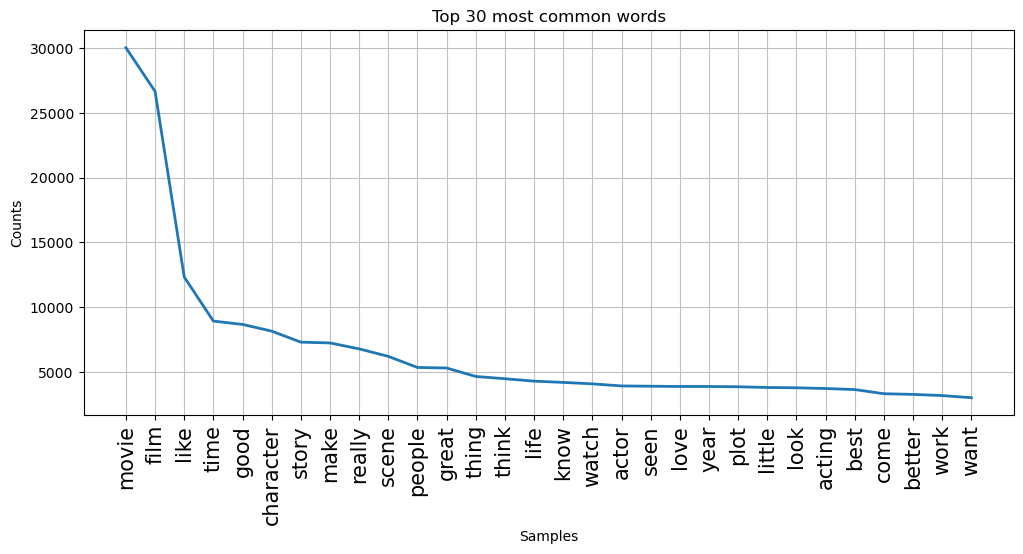

In [51]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words2)

plt.figure(figsize=(12,5))
plt.title('Top 30 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(30, cumulative=False)

plt.show()

In [52]:
domain_stopwords = ['movie', 'film', 'make', 'time', 'think','thing','know','seen','people','life']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [53]:
# Normalize case
cleaned_review1_lower = [review.lower() for review in cleaned_review1]


# Remove stopwords
cleaned_review1_final = []
for review in cleaned_review1_lower:
    words = review.split()
    filtered_words = [word for word in words if word not in final_stopwords]
    cleaned_review1_final.append(" ".join(filtered_words))

# Count unique words after stopwords removal
all_words_cleaned = []
for review in cleaned_review1_final:
    all_words_cleaned.extend(review.split())

print("Number of unique words after stopwords removal:", len(set(all_words_cleaned)))


Number of unique words after stopwords removal: 100140


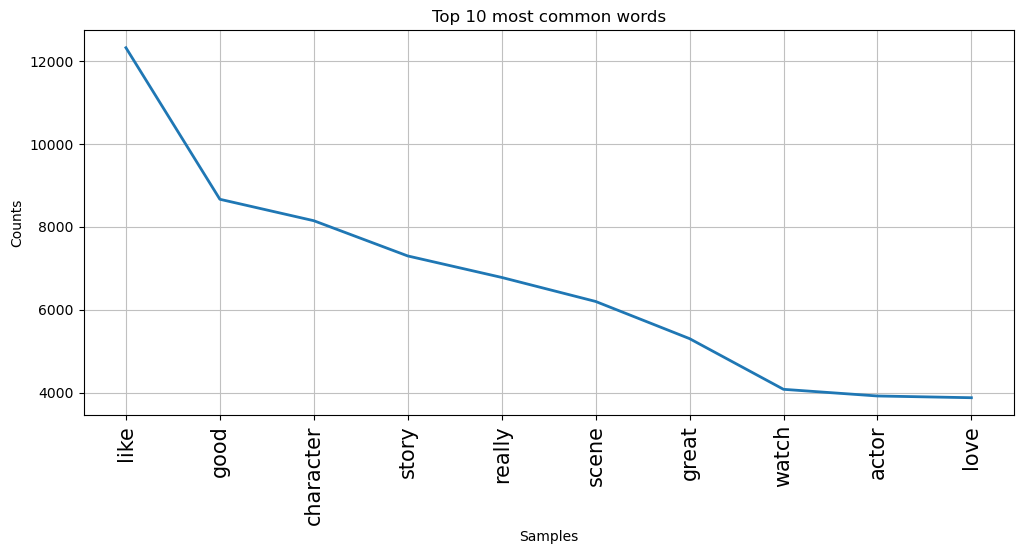

In [54]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words_cleaned)

plt.figure(figsize=(12,5))
plt.title('Top 10 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(10, cumulative=False)

plt.show()

In [56]:
Movie_df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",1


In [57]:
# Add the lists as new columns
Movie_df1['cleaned_review1'] =cleaned_review1
Movie_df1['cleaned_review1_final'] =cleaned_review1_final

# Save the modified DataFrame back to the CSV file
Movie_df1.to_csv('your_modified_csv_file.csv', index=False)


In [58]:
Movie_df1.head()

,review,sentiment,cleaned_review1,cleaned_review1_final
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",1,reviewer mentioned watching episode hooked right exactly happened methe thing struck brutality unflinching scene violence right word trust faint hearted timid pull punch regard drug violence hardc...,reviewer mentioned watching episode hooked right exactly happened methe struck brutality unflinching scene violence right word trust faint hearted timid pull punch regard drug violence hardcore cl...
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",1,"wonderful little production filming technique unassuming time fashion give comforting discomforting sense realism entire piece actor extremely chosen michael sheen ""has polari"" voice truly seamles...","wonderful little production filming technique unassuming fashion comforting discomforting sense realism entire piece actor extremely chosen michael sheen ""has polari"" voice truly seamless editing ..."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",1,thought wonderful spend time summer weekend sitting conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable bread suspected serial killer disappointed re...,thought wonderful spend summer weekend sitting conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable bread suspected serial killer disappointed realize...
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,0,basically family little jake think zombie closet parent fighting timethis movie slower soap opera suddenly jake decides rambo kill zombieok going make film decide thriller drama drama movie watcha...,basically family little jake zombie closet parent fighting timethis slower soap opera suddenly jake decides rambo kill zombieok going decide thriller drama drama watchable parent divorcing arguing...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",1,"petter mattei ""love time money"" visually stunning film watch mattei offer vivid portrait human relation movie telling money power success people different situation encounter variation arthur schn...","petter mattei ""love money"" visually stunning watch mattei offer vivid portrait human relation telling money power success different situation encounter variation arthur schnitzler play theme direc..."


#### Feature Extraction

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(Movie_df1['cleaned_review1_final'])


In [60]:
CV_features.shape

(15000, 80565)

In [61]:
 CV_features[10]

<1x80565 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [62]:
CV_features[10].todense() 

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features,Movie_df1['sentiment'], test_size=0.25, stratify=Movie_df1['sentiment'], random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Logistic Regression
LR = LogisticRegression(solver='liblinear')

# Train the model
LR.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

# confusion matrix for training data and testing data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

print("\nConfusion Matrix for Testing Data:")
print(confusion_matrix(y_test, y_test_pred))

# classification report for training data and testing data
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))


0.9992
0.8610666666666666
Confusion Matrix for Training Data:
[[5702    5]
 [   4 5539]]

Confusion Matrix for Testing Data:
[[1615  287]
 [ 234 1614]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5707
           1       1.00      1.00      1.00      5543

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1902
           1       0.85      0.87      0.86      1848

    accuracy                           0.86      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.86      0.86      0.86      3750



In [65]:

# Initialize Logistic Regression with L1 regularization
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.25)

# Train the model
LR1.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_lr1 = LR1.predict(X_train)
y_test_pred_lr1 = LR1.predict(X_test)

# Compute and print confusion matrix for training data
print("Confusion Matrix for Training Data (LR1):")
print(confusion_matrix(y_train, y_train_pred_lr1))

# Compute and print confusion matrix for testing data
print("\nConfusion Matrix for Testing Data (LR1):")
print(confusion_matrix(y_test, y_test_pred_lr1))

# Generate classification report for training data
print("\nClassification Report for Training Data (LR1):")
print(classification_report(y_train, y_train_pred_lr1))

# Generate classification report for testing data
print("\nClassification Report for Testing Data (LR1):")
print(classification_report(y_test, y_test_pred_lr1))


Confusion Matrix for Training Data (LR1):
[[5145  562]
 [ 426 5117]]

Confusion Matrix for Testing Data (LR1):
[[1610  292]
 [ 226 1622]]

Classification Report for Training Data (LR1):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5707
           1       0.90      0.92      0.91      5543

    accuracy                           0.91     11250
   macro avg       0.91      0.91      0.91     11250
weighted avg       0.91      0.91      0.91     11250


Classification Report for Testing Data (LR1):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1902
           1       0.85      0.88      0.86      1848

    accuracy                           0.86      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.86      0.86      0.86      3750



In [66]:
X = CV_features
y = Movie_df1['sentiment']

In [67]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [68]:
import numpy as np

In [69]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.25)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

[0.85133333 0.84633333 0.86233333 0.86166667 0.85366667]
85.51 0.61


In [70]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([0.19490385, 0.20763397, 0.20378709, 0.20105648, 0.2218132 ]),
 'score_time': array([0.00200272, 0.00311303, 0.0030973 , 0.00301576, 0.00306773]),
 'test_score': array([0.852     , 0.84633333, 0.86233333, 0.862     , 0.854     ]),
 'train_score': array([0.91641667, 0.91366667, 0.91541667, 0.91066667, 0.91766667])}

In [71]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.91641667 0.91366667 0.91541667 0.91066667 0.91766667]
91.48 0.24


In [72]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.852      0.84633333 0.86233333 0.862      0.854     ]
85.53 0.61


In [73]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(.10, 4, 0.10) 

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


In [74]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.30000000000000004}, 0.8558, 2)

In [75]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

85.58

In [76]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

92.45166666666667

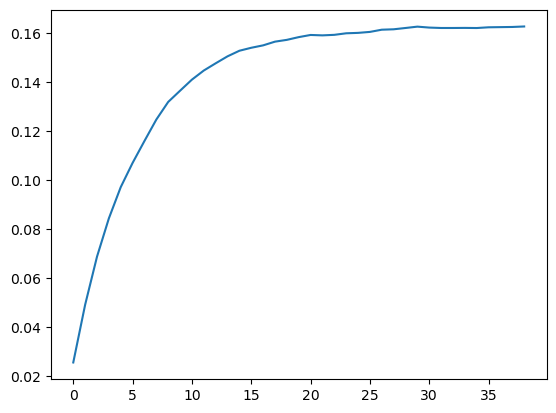

In [77]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

Fitting 5 folds for each of 78 candidates, totalling 390 fits
Best hyperparameters: {'C': 0.1}
Best mean test accuracy: 86.61333333333333


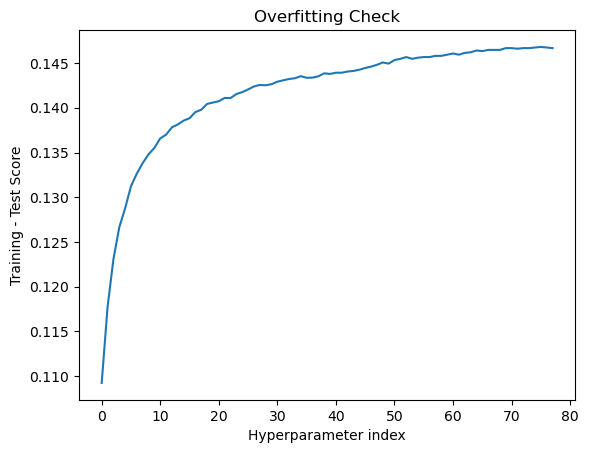

Confusion Matrix:
[[7355  254]
 [ 168 7223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7609
           1       0.97      0.98      0.97      7391

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define logistic regression model with L2 regularization
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2')

# Define range of hyperparameters to search over
C_values = np.arange(0.1, 4, 0.05)

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=LR2, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X, y)

# Print best hyperparameters and corresponding scores
print("Best hyperparameters:", grid_results.best_params_)
print("Best mean test accuracy:", grid_results.cv_results_['mean_test_score'][grid_results.best_index_] * 100)

# Plot the difference between mean training and test scores
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])
plt.xlabel('Hyperparameter index')
plt.ylabel('Training - Test Score')
plt.title('Overfitting Check')
plt.show()

# Initialize logistic regression model with L2 regularization using the best hyperparameters
best_LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=grid_results.best_params_['C'])

# Train the model with the entire dataset (X, y)
best_LR2.fit(X, y)

# Predict on the entire dataset
y_pred_LR2 = best_LR2.predict(X)

# Compute and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_LR2))

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_LR2))


In [79]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = Movie_df1['cleaned_review1_final']
y = Movie_df1['sentiment']

CV = CountVectorizer()
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.1)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR2)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

86.61 0.56


#### Final Result by Using S.V.M

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(Movie_df1['cleaned_review1_final'])


In [82]:


# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Movie_df1['sentiment'], test_size=0.25, random_state=42)

# Step 2: Initialize and Train the SVM Model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1656  265]
 [ 221 1608]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1921
           1       0.86      0.88      0.87      1829

    accuracy                           0.87      3750
   macro avg       0.87      0.87      0.87      3750
weighted avg       0.87      0.87      0.87      3750

